# PRACTICA 3 - GRUPO 5

Para el desarrollo de esta práctica hemos seleccionado de kaggle el dataset ["Global Cybersecurity Threats"](https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024), el mismo que posee un registro de información sobre cyberattacks, malware, industrias y países afectados, entre otros tipos de información relacionada, la cual procederemos a analizar.

## Tratamiento y Preprocesamiento

Como primer paso realizaremos la instalación de las librerías que utilizaremos durante la práctica.


In [1]:
#Instalación de los paquetes/modelos
%pip install NLTK
%pip install transformers
%pip install spaCy
!python -m spacy download en_core_web_sm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Importamos la librería pandas, numpy, matplotlib y seaborn
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a extraer el archivo .csv de la ruta DATA.

In [3]:
# Ruta de acceso a los datos
csv_path = 'DATA/Global_Cybersecurity_Threats_2015-2024.csv'

# Especificamos el separador
data = pd.read_csv(csv_path, sep=',')

# Mostrar las primero 5 filas
data.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


Como parte del procesamiento vamos a identificar el tamaño de la DATA.

In [4]:
print(data.shape)


(3000, 10)


Ahora llevaremos toda la información tipo texto de la tabla a minúsculas, para ello usaremos la función .apply y lambda.col para recorrer las columnas de la data en busca de texto, una vez identificada, se procede a convertir a minúsculas con .strlower().

In [5]:
# Convertir todo el Data tipo texto a minúsculas
data = data.apply(lambda col: col.str.lower() if col.dtype == 'object' else col)

# Verificamos los cambios
print(data.head())

   Country  Year        Attack Type     Target Industry  \
0    china  2019           phishing           education   
1    china  2019         ransomware              retail   
2    india  2017  man-in-the-middle                  it   
3       uk  2024         ransomware  telecommunications   
4  germany  2018  man-in-the-middle                  it   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  hacker group   
1                          62.19                    295961  hacker group   
2                          38.65                    605895  hacker group   
3                          41.44                    659320  nation-state   
4                          74.41                    810682       insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          unpatched software                    vpn   
1          unpatched software               firewall   
2              weak 

También verificamos si existen valores faltantes en alguna de las columas, para esto usamos .isnull() y .sum() para contabilizar.

In [6]:
# Verificamos si existen valores faltantes
valores_faltantes = data.isnull().sum()
print('Valores faltantes por columna:')
print(valores_faltantes)

Valores faltantes por columna:
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


En caso de existir datos vacíos procedemos a rellenar con la palabra "faltante". Utilizamos la función .apply y lambda.x para buscar en cada celda de una columna y con  isinstance(x, str) identificamos si es del tipo texto, luego con x.strip() eliminamos los espacios vacíos. 

In [7]:
# Rellenar los espacios en blanco con un valor específico ('faltante')
data = data.apply(lambda x: 'faltante' if isinstance(x, str) and (x.strip() == '' or x is None) else x)

# Mostrar la Data después de rellenar
print("\nData después de rellenar los espacios en blanco:")
print(data)


Data después de rellenar los espacios en blanco:
      Country  Year        Attack Type     Target Industry  \
0       china  2019           phishing           education   
1       china  2019         ransomware              retail   
2       india  2017  man-in-the-middle                  it   
3          uk  2024         ransomware  telecommunications   
4     germany  2018  man-in-the-middle                  it   
...       ...   ...                ...                 ...   
2995       uk  2021         ransomware          government   
2996   brazil  2023      sql injection  telecommunications   
2997   brazil  2017      sql injection                  it   
2998       uk  2022      sql injection                  it   
2999  germany  2021      sql injection              retail   

      Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                             80.53                    773169  hacker group   
1                             62.19            

Este código agrupa los datos por *Country* y *Year*, contando cuántos ataques ocurren en cada combinación de estos dos factores, y crea una nueva columna con esa información. Luego, imprime las primeras filas del resultado para ver cómo quedó la tabla agrupada. Después, genera una gráfica de barras donde el eje X muestra los años y el eje Y el número de ataques, diferenciando los países por colores. La gráfica se personaliza con un título, etiquetas para los ejes, rotación de las etiquetas del eje X para mejor visibilidad, y la leyenda se ajusta para mostrar los países al lado de la gráfica. Finalmente, se muestra la gráfica con los ajustes realizados para evitar solapamientos.

     Country  Year  Número de ataques
0  australia  2015                 22
1  australia  2016                 34
2  australia  2017                 28
3  australia  2018                 32
4  australia  2019                 27


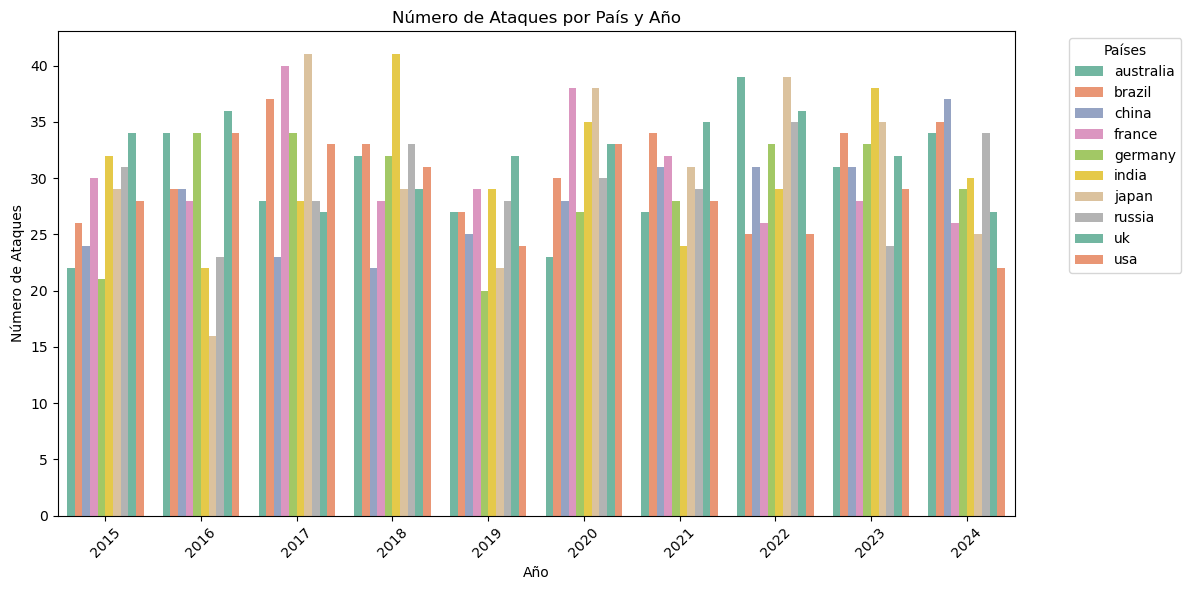

In [8]:
import pandas as pd
import matplotlib.pyplot as plt  # Importar matplotlib para gráficos
import seaborn as sns  # Importar seaborn para gráficos

# Creación de las columnas según el dataset
data_grouped = data.groupby(['Country', 'Year']).size().reset_index(name='Número de ataques')

# Verificación de la tabla agrupada
print(data_grouped.head())

# Crear una gráfica de barras con colores personalizados
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Número de ataques', hue='Country', data=data_grouped, palette='Set2') 

# Personalización de la gráfica
plt.title('Número de Ataques por País y Año')
plt.xlabel('Año')
plt.ylabel('Número de Ataques')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor visibilidad
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ubicación de la leyenda

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Este código agrupa los datos por dos columnas: *'Attack Type'* (tipo de ataque) y *'Target Industry'* (industria objetivo), contando cuántos ataques ocurren en cada combinación de estos dos factores y creando una nueva columna llamada 'Número de ataques' con esa información. Luego, genera una gráfica de barras horizontal donde el eje Y muestra las industrias y el eje X muestra el número de ataques, diferenciando los tipos de ataque por colores. La gráfica se personaliza con un título, etiquetas para los ejes y una leyenda que se ubica fuera del gráfico

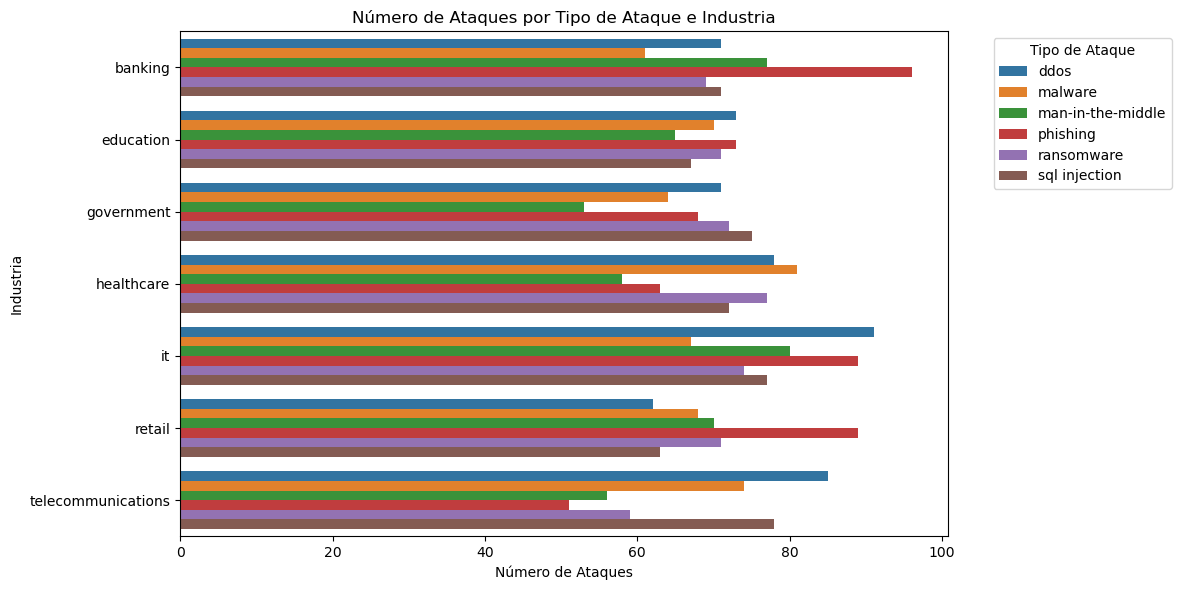

In [9]:
# Agrupar los datos por 'Tipo de ataque' e 'Industria' y contar los ataques
data_grouped = data.groupby(['Attack Type', 'Target Industry']).size().reset_index(name='Número de ataques')

# Crear una gráfica de barras horizontal
plt.figure(figsize=(12, 6))
sns.barplot(x='Número de ataques', y='Target Industry', hue='Attack Type', data=data_grouped, orient='h')

# Personalizar la gráfica
plt.title('Número de Ataques por Tipo de Ataque e Industria')
plt.xlabel('Número de Ataques')
plt.ylabel('Industria')
plt.legend(title='Tipo de Ataque', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ubicación de la leyenda

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Se agrupan los datos por país y suma las pérdidas financieras en millones de dólares para cada uno, tener en cuenta que la columna se llama *Financial Loss (in Million $)* , creando una nueva columna llamada 'Pérdida financiera total'. Luego, ordena los países en función de la suma de las pérdidas financieras de forma descendente y selecciona los 5 países con mayores pérdidas. A continuación, genera un gráfico de pastel (o tarta) donde se muestra la proporción de las pérdidas financieras de esos 5 países, utilizando colores personalizados y mostrando el porcentaje de cada parte del total

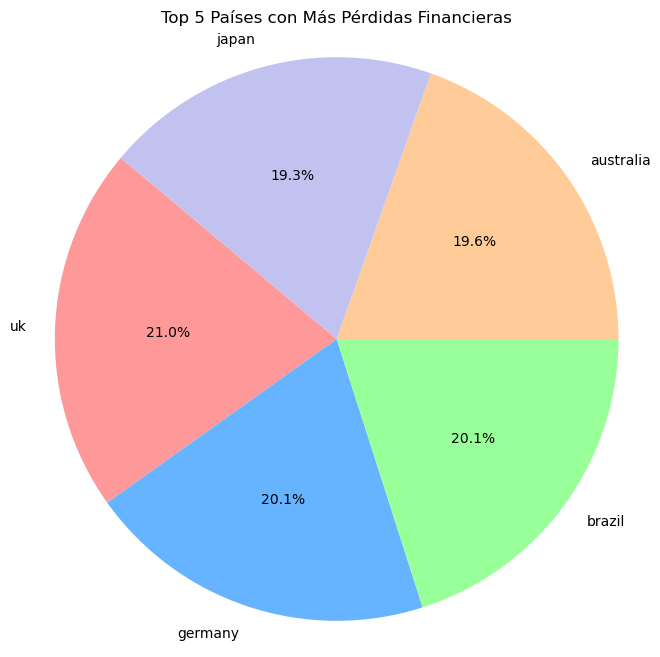

In [10]:
# Agrupar los datos por 'Country' y sumar las pérdidas financieras
df_financial_loss = data.groupby('Country')['Financial Loss (in Million $)'].sum().reset_index(name='Pérdida financiera total')

# Ordenar los países por la suma de pérdidas financieras en orden descendente y seleccionar los 5 primeros
df_top5_loss = df_financial_loss.sort_values(by='Pérdida financiera total', ascending=False).head(5)

# Crear un gráfico de pastel 
plt.figure(figsize=(8, 8))
plt.pie(df_top5_loss['Pérdida financiera total'], labels=df_top5_loss['Country'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

# Personalización del gráfico
plt.title('Top 5 Países con Más Pérdidas Financieras')

# Mostrar la gráfica
plt.axis('equal')  # Para que el gráfico se vea como un círculo
plt.show()

Se calcula el promedio de tiempo de resolución para cada tipo de ataque. Luego, se crea un gráfico de barras donde se resalta en amarillo el tipo de ataque que ha tenido el mayor tiempo de resolución, mientras que los demás ataques se muestran con el color azul. Finalmente, se imprime en la consola el nombre del tipo de ataque que más tiempo tardó en resolverse junto con el promedio de tiempo que tardó en horas.

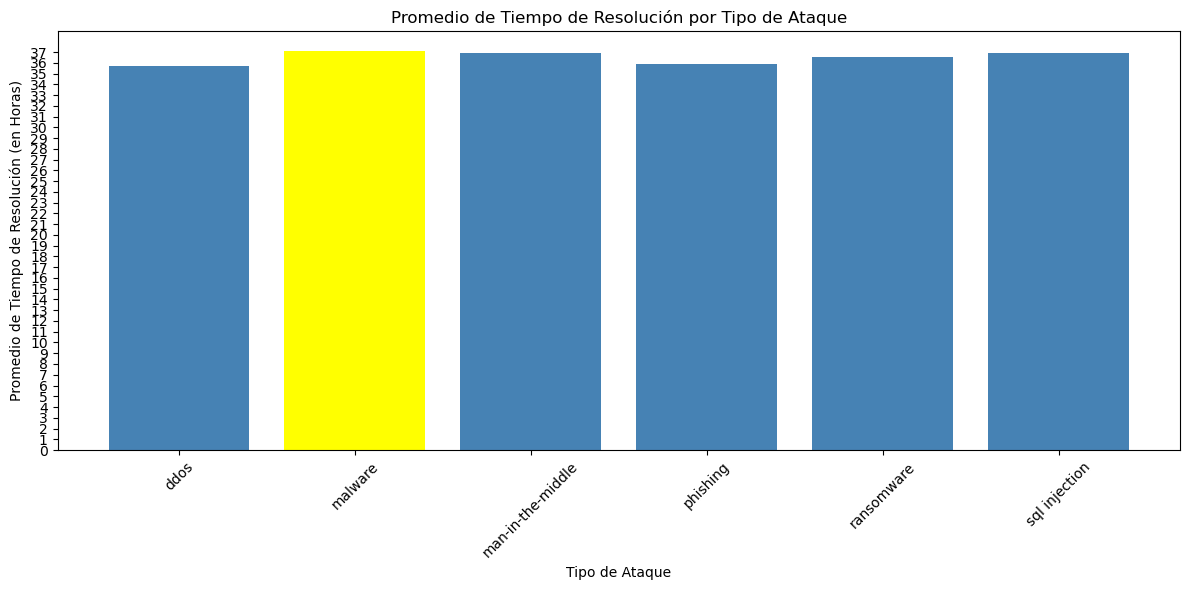

El ataque con el mayor tiempo de resolución es 'malware' con un promedio de 37.07 horas.


In [11]:
# Agrupar los datos por 'Attack Type' y calcular el promedio del tiempo de resolución
data_avg_resolution = data.groupby('Attack Type')['Incident Resolution Time (in Hours)'].mean().reset_index()

# Encontrar el tipo de ataque que tiene el máximo tiempo de resolución
max_time_attack = data_avg_resolution.loc[data_avg_resolution['Incident Resolution Time (in Hours)'].idxmax()]

# Agrupar los datos por 'Attack Type' y calcular el promedio del tiempo de resolución
data_avg_resolution = data.groupby('Attack Type')['Incident Resolution Time (in Hours)'].mean().reset_index()

# Encontrar el tipo de ataque que tiene el máximo tiempo de resolución
max_time_attack = data_avg_resolution.loc[data_avg_resolution['Incident Resolution Time (in Hours)'].idxmax()]

# Crear un gráfico de barras para mostrar el promedio de tiempo de resolución por tipo de ataque
plt.figure(figsize=(12, 6))

# Graficar cada barra con color amarillo si es el ataque con el máximo tiempo
for i, row in data_avg_resolution.iterrows():
    if row['Attack Type'] == max_time_attack['Attack Type']:
        color = 'yellow'  # Asignar amarillo al ataque con el máximo tiempo
    else:
        color = 'steelblue'  # Asignar un color diferente (puedes elegir otro color si lo prefieres)
    
    plt.bar(row['Attack Type'], row['Incident Resolution Time (in Hours)'], color=color)

# Personalizar la gráfica
plt.title('Promedio de Tiempo de Resolución por Tipo de Ataque')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Promedio de Tiempo de Resolución (en Horas)')

# Ajustar los valores del eje Y para que vaya de 1 en 1
plt.yticks(range(0, int(data_avg_resolution['Incident Resolution Time (in Hours)'].max()) + 1, 1))  # Aumento el intervalo en Y a 1

# Rotar las etiquetas del eje X para mejor visualización
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Imprimir el tipo de ataque con el máximo tiempo de resolución y el promedio
print(f"El ataque con el mayor tiempo de resolución es '{max_time_attack['Attack Type']}' con un promedio de {max_time_attack['Incident Resolution Time (in Hours)']:.2f} horas.")


El siguiente gráfico nos permite identificar el tipo de vulnerabilidad de seguridad que es más realizada según la fuente de ataque, para ello primero con la implementación de la función .groupby agrupamos y contabilizamos la frecuencia de la vulnerabilidad de cada ataque, y estos valores son establecidos con .reset_index en una nueva columna denominada conteo. Luego creamos el gráfico de barras con .barplot() de la librería seaborn y configuramos las respectivas etiquetas.

   Attack Source Security Vulnerability Type  conteo
0   hacker group          social engineering     190
5        insider          unpatched software     202
11  nation-state                    zero-day     216
15       unknown                    zero-day     215


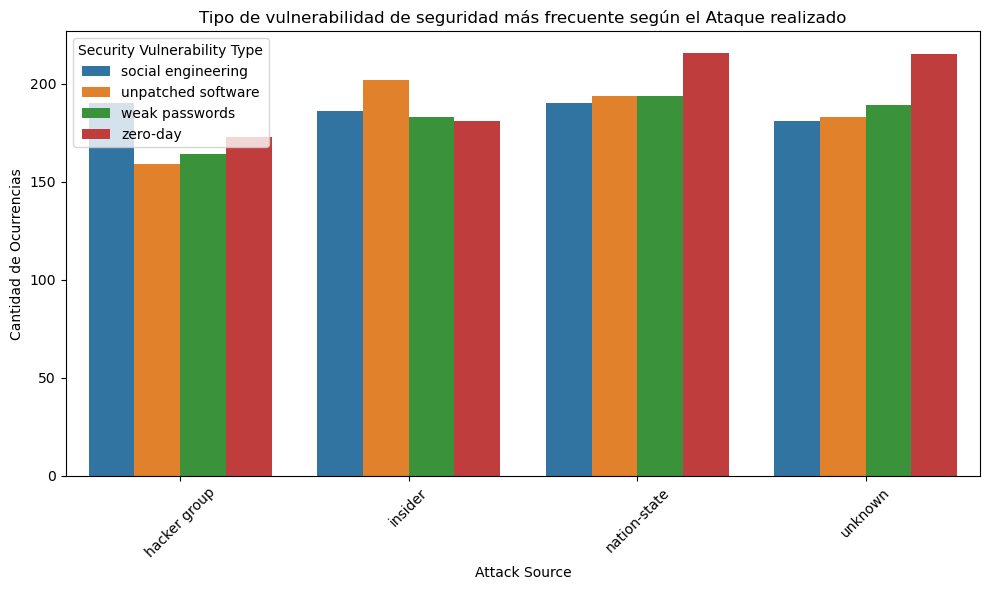

In [12]:
# Contar las ocurrencias de cada combinación 'Attack Source' y 'Security Vulnerability Type'
conteo = data.groupby([ 'Attack Source','Security Vulnerability Type']).size().reset_index(name='conteo')

# Identificamos el ataque con su vulnerabilidad más alta
max_vulnerabilidad = conteo.loc[conteo.groupby('Attack Source')['conteo'].idxmax()]

# Mostrar la vulnerabilidad más frecuente para cada ataque
print(max_vulnerabilidad[['Attack Source', 'Security Vulnerability Type', 'conteo']])

# Graficar con barras
plt.figure(figsize=(10, 6))
sns.barplot(conteo, x='Attack Source', y='conteo', hue='Security Vulnerability Type')

# Agregar etiquetas y título
plt.title('Tipo de vulnerabilidad de seguridad más frecuente según el Ataque realizado')
plt.xlabel('Attack Source')
plt.ylabel('Cantidad de Ocurrencias')
plt.xticks(rotation=45) 
plt.tight_layout()

# Mostrar gráfico
plt.show()


## Código para guardar registros en PostgreSQL
Como primer paso realizaremos la instalación de la librería para conectar python con postgresql.

In [13]:
#Instalación de los paquetes
%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Importamos la librería
import pandas as pd
import psycopg2
from psycopg2 import sql
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
from io import StringIO
import os
from dotenv import load_dotenv

Creamos una función para crear la base de datos 

In [15]:
# Configuración (usa .env para seguridad)
load_dotenv()

BASE_CONFIG = {
    'host': os.getenv('DB_HOST', 'localhost'),
    'user': os.getenv('DB_USER', 'postgres'),
    'password': os.getenv('DB_PASSWORD', ''),
    'port': os.getenv('DB_PORT', '5432')
}

DB_NAME = os.getenv('DB_NAME', 'bdd_threats_cybersecurity')

# Crea la base de datos si no existe 
def crear_basedatos(dbname):    
    try:
        # Conexión al servidor PostgreSQL (sin base de datos específica)
        conn = psycopg2.connect(**BASE_CONFIG)
        conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
        
        with conn.cursor() as cursor:
            # Verificar si la base de datos existe
            cursor.execute(sql.SQL("SELECT 1 FROM pg_database WHERE datname = %s"), [dbname])
            exists = cursor.fetchone()
            
            if not exists:
                cursor.execute(sql.SQL("CREATE DATABASE {}").format(
                    sql.Identifier(dbname)))
                print(f"✅ Base de datos '{dbname}' creada exitosamente")
            else:
                print(f"ℹ️ La base de datos '{dbname}' ya existe")
    
    except Exception as e:
        print(f"❌ Error al crear la base de datos: {e}")
        raise
    finally:
        if 'conn' in locals():
            conn.close()

Creamos una función para guardar los registros que necesitemos colocando el número de registros que que queremos pasar a la base de datos. 

In [16]:
def guardar_registros(df, table_name, dbname=DB_NAME, n_registros=None):
    """
    Carga un DataFrame de pandas a una tabla de PostgreSQL.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos a cargar
        table_name (str): Nombre de la tabla destino
        dbname (str): Nombre de la base de datos        
        n_registros (int): Número de registros a cargar (None para todos)
    """
    try:
        # 1. Crear la base de datos si no existe
        crear_basedatos(dbname)
        
        # 2. Configuración de conexión con la base de datos específica
        db_config = {**BASE_CONFIG, 'database': dbname}
        
        # 3. Filtrar registros si se especifica n_registros
        if n_registros is not None:
            df = df.head(n_registros)
            print(f"⚠️ Se cargarán solo los primeros {n_registros} registros")
        
        # Resto del código permanece igual...
        with psycopg2.connect(**db_config) as conn:
            with conn.cursor() as cursor:
                conn.autocommit = False
                
                # Crear tabla (si no existe)
                columns = []
                for col, dtype in df.dtypes.items():
                    col_clean = col.replace(' ', '_').lower()
                    if pd.api.types.is_integer_dtype(dtype):
                        pg_type = 'BIGINT'
                    elif pd.api.types.is_float_dtype(dtype):
                        pg_type = 'FLOAT'
                    elif pd.api.types.is_datetime64_any_dtype(dtype):
                        pg_type = 'TIMESTAMP'
                    else:
                        pg_type = 'TEXT'
                    columns.append(f'"{col_clean}" {pg_type}')
                
                create_query = sql.SQL("""
                    CREATE TABLE IF NOT EXISTS {table} (
                        {columns}
                    );
                """).format(
                    table=sql.Identifier(table_name),
                    columns=sql.SQL(',\n'.join(columns)))
                
                cursor.execute(create_query)
                
                # Cargar datos usando COPY
                buffer = StringIO()
                df.to_csv(buffer, index=False, header=False, sep='\t', na_rep='NULL')
                buffer.seek(0)
                
                cursor.copy_expert(
                    sql.SQL("COPY {} FROM STDIN WITH (FORMAT CSV, DELIMITER '\t', NULL 'NULL')")
                    .format(sql.Identifier(table_name)),
                    buffer)
                
                conn.commit()
                print(f"✅ Datos cargados exitosamente en {dbname}.{table_name}: {len(df)} registros")
    
    except Exception as e:
        print(f"❌ Error: {e}")
        if 'conn' in locals():
            conn.rollback()
        raise

Ejecutamos las funciones anteriores

In [17]:
# Ejecutar programa
if __name__ == "__main__":     
    # Cargar todos los registros
    #guardar_registros(threats, 'cyber_threats')

    # Cargar los registros especificados en n_registros preprocesados
    guardar_registros(data, 'cyber_threats', n_registros=20)

✅ Base de datos 'bdd_threats_cybersecurity' creada exitosamente
⚠️ Se cargarán solo los primeros 20 registros
✅ Datos cargados exitosamente en bdd_threats_cybersecurity.cyber_threats: 20 registros
